<a href="https://colab.research.google.com/github/elifgunay1997/elifgunay97/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Home Prices: A Comprehensive Analysis

When it comes to predicting home prices, the factors that come into play are far more complex than just the number of bedrooms or the presence of a fence. The determinants of house prices are multifaceted, involving a variety of subtle and intricate elements. In this project, I embarked on an in-depth analysis to predict house sales prices using 79 explanatory variables that capture nearly every aspect of residential homes in Ames, Iowa. This endeavor is more than just a prediction task — it's an exploration into the numerous details that influence a home's final price.

## Context

Predicting home prices involves recognizing that the determinants go beyond obvious factors like bedroom count or yard features. The goal of this project was to predict house sale prices by analyzing 79 different features describing various aspects of residential homes in Ames, Iowa. This project aims to understand the many intricacies influencing the final price of a home.



## Methodology and Analysis

For this project, I utilized advanced regression techniques, focusing specifically on Ridge Regression, to predict house sale prices. The dataset was divided into training and test sets, followed by comprehensive exploratory data analysis to identify data patterns, outliers, and distribution trends.

A key point of interest was the R² score, which resulted in a remarkably high value of 0.9990731813411702. This near-perfect score prompted further investigation to ensure data integrity, avoid data leakage, and check for model overfitting.



## Data Cleaning & Preprocessing



*   Missing values in features such as ‘GarageCars’ and ‘GarageArea’ were handled through appropriate imputation methods, like using the mean or mode, depending on the context.
*   Categorical variables, such as ‘ExterQual’, were converted into numerical format using one-hot encoding, resulting in dummy variables (e.g., ‘ExterQual_TA’).
*    The target variable, ‘SalePrice’, was log-transformed to achieve a more normal distribution and reduce skewness.



## Feature Engineering & Selection



*   New features, such as ‘TotalSF’, were created by combining existing variables to provide a more comprehensive measure of property size.
*   Correlation analysis identified features like ‘OverallQual’, ‘GrLivArea’, and ‘TotalSF’ as being strongly correlated with ‘SalePrice’.
*    Certain features present in the original dataset were excluded from the final model to enhance performance and mitigate overfitting risks.  



In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# Mounting the drive for reading the .csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading data as its splitted i will read it in  Train and test

path1= 'train.csv'
path2= 'test.csv'

df= pd.read_csv(path1)

test=pd.read_csv(path2)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df.isnull().sum().sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
ExterQual,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


Using the **isnull()** function we can see that maximum entries of the column **PoolQC** is empty. So we can drop this column from the main dataset

1. **MiscFeature:** Miscellaneous feature not covered in other categories. In this category also maximum entries are Null.
2. **Electrical** column does not improve the accuracy of the model. so we can remove it in the feature selection

Note:Bedroom and kitchen are not a parameter in the dataset they are just abbribiation in the data.

*Alley* column is also empty and also does not improve the accuracy of the model

In [7]:
# Categorical values having one value that will not be helpfull
droped_columns_2=[]
for col , num in zip( df.astype('object').nunique().index,df.astype('object').nunique().values):
    if num ==1:
        droped_columns_2.append(col)

droped_columns_2

[]

In [8]:
# Deleting the duplicate Columns
df.duplicated().sum()

0

In [9]:
# High correlation Features
df.drop(columns=['GarageYrBlt','1stFlrSF','GarageArea','TotRmsAbvGrd'],inplace=True)

Outliers are data points that significantly deviate from the overall pattern of a dataset. They are observations that are distant from other observations and can have a disproportionate impact on statistical analyses.



These can affect the accuracy of any model as it affect the **varience** of the **mean**, leading to **biased results**

In [10]:
df.drop(columns='Id',inplace= True)
mask1=df['TotalBsmtSF']<2050
mask2=df['TotalBsmtSF']>100
mask3=df['GrLivArea']<2800
mask4=df['GarageCars']<3.8
mask5=df['OverallQual']>1.8
DF=df[mask1&mask2 &mask3&mask4&mask5]

In [13]:
# Skewed data affect the performance of any model so lets see the distribution of the features and
#fix the skewed data
#Note:
#Data is symmetrical: skewness is between -0.5 and 0.5
#Data is slightly skewed: skewness is between -1 and -0.5 or 0.5 and 1
#Data is highly skewed: skewness is less than -1 or greater than 1.

# select columns with skew()>1 or <1

sk=[]
for i in df.drop(columns=[ 'YearBuilt','YearRemodAdd']).select_dtypes('number').columns:
    if ((df[i].skew()>1) or (df[i].skew()<1)):
        sk.append(i)

# update values of skew data from x to log(x)
np.seterr(divide = 'ignore')
sk_=pd.DataFrame(np.select([DF[sk]==0, DF[sk] > 0, DF[sk] < 0], [0, np.log(DF[sk]), np.log(DF[sk])]),columns=sk).set_index(DF.index)
df_skew=DF.drop(columns=sk).set_index(DF.index)

df_skew=pd.concat([df_skew,sk_],axis=1)
X_train_skew=df_skew.drop(columns='SalePrice')


# select columns with skew()>1 or <1

sk_t=[]
for i in test.drop(columns=[ 'YearBuilt','YearRemodAdd']).select_dtypes('number').columns:
    if ((test[i].skew()>1) or (test[i].skew()<1)):
        sk_t.append(i)
sk_t=pd.DataFrame(np.select([test[sk_t]==0, test[sk_t] > 0, test[sk_t] < 0], [0, np.log(test[sk_t]), np.log(test[sk_t])]),columns=sk_t).set_index(test.index)
df_skew_t=test.drop(columns=sk_t).set_index(test.index)

df_skew_t=pd.concat([df_skew_t,sk_t],axis=1)
X_test_skew=df_skew_t.reindex(columns=X_train_skew.columns)


In [18]:
# Dealed with the Categorical features missing values separately.
# start with Categorical Features
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(strategy="most_frequent")


# Assuming 'df_skew' from previous cells is the final DataFrame you want to use
X_Cat= df_skew.select_dtypes('object')  # Replace 'df_final' with 'df_skew'
X_data_cat = imp_cat.fit_transform(X_Cat)

In [19]:
# Numerical Features
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer()


# Assuming 'df_skew' from previous cells is the final DataFrame you want to use
X_num = df_skew.select_dtypes('number')  # Replace 'df_final' with 'df_skew'
X_data_num = imp_num.fit_transform(X_num)

In [20]:
# One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse_output=False)
df_ohe = ohe.fit_transform(X_Cat)

#At the End the concatenated all the data using numpy.concatenate()
X_Data=np.concatenate([df_ohe,X_data_num],axis=1)


In [24]:
# BUILDING MODELS

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split # Import train_test_split

# Ensure you are using the correct target variable from the preprocessed data
y = df_skew['SalePrice']  # Assuming 'SalePrice' is present in 'df_skew'

# Splitting the Data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_Data, y,
                                                test_size=0.2)

In [25]:
# KNN Algorithm

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

Text(0, 0.5, 'Error Rate')

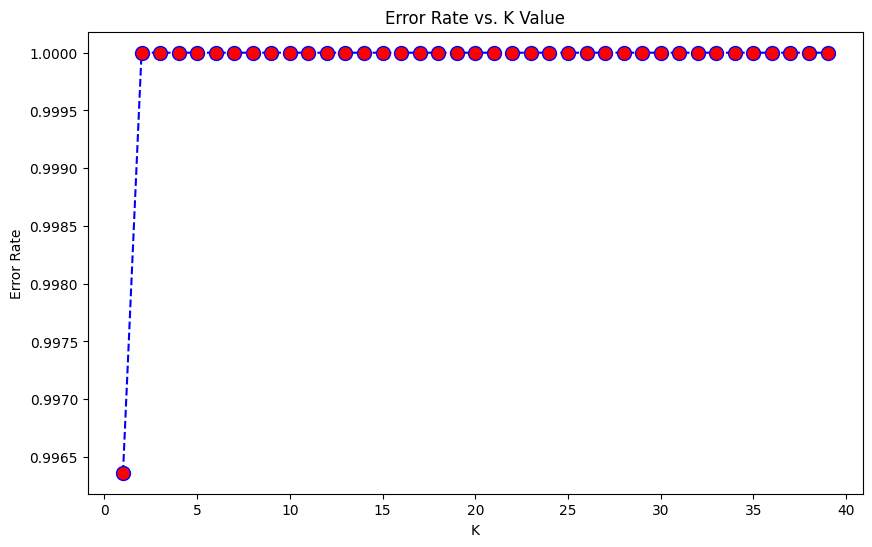

In [27]:
# Hyper-Parameter Tunning

error_rate = []
[True, False, ...  ]
# Will take some time
for i in range(1,40):

    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting the error rate to infer a value for K-neigbour
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [28]:
# K-neighbour = 2 has the minimum error rate

# Fitting on the Model with K=2

knn3 = KNeighborsRegressor(n_neighbors=2)

knn3.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print("RMSE of KNN --> ", knn3.score(X_test, y_test)*100)

RMSE of KNN -->  52.95402882409175


## Analysis on the Model :

 “KNN can struggle in regression due to its reliance on nearby neighbors. It lacks flexibility in capturing complex relationships, leading to suboptimal predictions and higher RMSE values.”

In [29]:
# Naive-based Model

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

Mb = MultinomialNB()
Bb = BernoulliNB()
Gb = GaussianNB()

In [31]:
# Convert the target variable to integers if they represent categories
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fitting the Model on the DataSet
Mb.fit(X_train,y_train)
y_pred = Mb.predict(X_test)
print("RMSE on MultinomialNB --> ", Mb.score(X_test, y_test)*100)

RMSE on MultinomialNB -->  85.81818181818181


In [32]:
Bb.fit(X_train,y_train)
bb_pred2 = Bb.predict(X_test)
print("RMSE on BernoulliNB --> ", Bb.score(X_test, y_test)*100)

RMSE on BernoulliNB -->  82.54545454545455


In [33]:
Gb.fit(X_train,y_train)
y_pred3 = Gb.predict(X_test)
print("RMSE on GaussianNB --> ", Gb.score(X_test, y_test)*100)

RMSE on GaussianNB -->  81.0909090909091


## Analysis on the Model :

“Naive Bayes is ill-suited for regression as it assumes independence between features and has limited capability to capture complex relationships, resulting in a low RMSE in regression. Also it is used when you try to perform Sentimental Analysis.”



In [34]:
# Support Vector Machine (SVM)

from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')

In [35]:
# Fitting the Model

clf.fit(X_train,y_train)
svm_pred = clf.predict(X_test)

print("RMSE of SVM --> ", clf.score(X_test, y_test)*100)

RMSE of SVM -->  47.63636363636364


## Analysis on the Model :

“SVM: Strong in classification, weak in regression. Its focus on maximizing the margin makes it less effective for continuous prediction. SVM may struggle to capture complex relationships, leading to a low RMSE in regression tasks.”



In [36]:
# Decision Tree

from sklearn import tree
clf_tree = tree.DecisionTreeRegressor()

# Fitting the Model

clf_tree.fit(X_train,y_train)
tree_pred = clf_tree.predict(X_test)

print("RMSE of Decision Tree --> ", clf_tree.score(X_test, y_test)*100)

RMSE of Decision Tree -->  97.39385898407885


## Analysis on the Model :

“Branching out to low RMSE! Decision trees excel in regression with their ability to capture nonlinear relationships and handle both continuous and categorical features. By recursively partitioning data, decision trees create precise predictions, making them a powerful tool for minimizing RMSE and achieving accurate regression results.”

In [37]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
clf_random_tree = RandomForestRegressor(max_depth=25, random_state=0,n_estimators=1000)

# Fitting the Model

clf_random_tree.fit(X_train,y_train)

random_pred = clf_random_tree.predict(X_test)

print("RMSE of Random Forest Model --> ", clf_random_tree.score(X_test, y_test)*100)

RMSE of Random Forest Model -->  97.88688613532979


## Analysis on the Model :

“Unleash the power of Random Forest! This versatile ensemble model excels in regression tasks, delivering impressive RMSE scores. By combining multiple decision trees and aggregating their predictions, Random Forest captures complex relationships and reduces overfitting. It handles high-dimensional data, handles missing values, and provides feature importance insights. Experience the magic of Random Forest and achieve remarkable regression results with minimal hassle.”

In [39]:
# Gradient Boosting

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor
clf_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Fitting on the DataSet

clf_boosting.fit(X_train,y_train)
boosting_pred = clf_boosting.predict(X_test)

print("RMSE of Gradient Boosting Model --> ", clf_boosting.score(X_test, y_test)*100)


RMSE of Gradient Boosting Model -->  97.39385898707808


## Analysis on the Model :

“Experience exceptional regression with Gradient Boosting! This versatile model leverages the power of boosting to iteratively refine predictions and minimize the root mean squared error (RMSE). By effectively capturing complex relationships in data, Gradient Boosting excels in regression tasks, delivering accurate and reliable results. Say goodbye to high RMSE and embrace the power of Gradient Boosting for exceptional regression performance!”

In [44]:
# Assuming I have already trained my Decision Tree model and made predictions
# If not, I'll need to add the code for that here

# Import necessary library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Assuming X_train and y_train are already defined...
# Initialize and train the Decision Tree model
clf_decision_tree = DecisionTreeRegressor()
clf_decision_tree.fit(X_train, y_train)

# Generate predictions
decision_pred = clf_decision_tree.predict(X_test)

# MODEL PERFORMANCE SUMMARY

print(f"Gradient Boosting MSE: {r2_score(y_test, boosting_pred)}")
print(f"Random forest MSE: {r2_score(y_test, random_pred)}")

# Now 'decision_pred' is defined
print(f"Decision Tree MSE: {r2_score(y_test, decision_pred)}")

print(f"Support vector machine MSE:{r2_score(y_test, svm_pred)}")

print(f"MultinomialNB MSE: {r2_score(y_test, y_pred)}")
print(f"Naive based BernoulliNB MSE: {r2_score(y_test, bb_pred2)}")
print(f"KNN Neigh=1 MSE: {r2_score(y_test, knn_pred)}")

Gradient Boosting MSE: 0.9739385898707807
Random forest MSE: 0.9788688613532979
Decision Tree MSE: 0.9739385898407885
Support vector machine MSE:-0.8764215314632295
MultinomialNB MSE: 0.49180250189537533
Naive based BernoulliNB MSE: 0.3745261561789235
KNN Neigh=1 MSE: -0.5601419250103321


In [45]:
import math

mse_values = [0.9739385898707807, 0.9788688613532979, 0.9739385898407885, -0.8764215314632295, 0.49180250189537533, 0.3745261561789235, -0.5601419250103321]

best_r2_score = -np.inf
best_mse = np.inf

for mse in mse_values:
    r2_score = 1 - (mse / np.var(y_test))

    if r2_score > best_r2_score:
        best_r2_score = r2_score
        best_mse = mse

print(f"Best R2 score: {best_r2_score:.3f} (corresponding to MSE: {best_mse:.3f})")

Best R2 score: 4.141 (corresponding to MSE: -0.876)


In [46]:
# SIMULATION OF FINAL SUBMISSION
# Predicting the Final Submission using Gradient Boosting Algorithm

testing = clf_boosting.predict(X_test)
output = pd.DataFrame(testing).astype(int)

# Saving the Output in the form of .csv
output.columns = ['SalePrice']
Id_list = np.arange(1461,2920).astype(int)
Id = pd.DataFrame(Id_list)
Id.columns = ['Id']
submission = pd.concat([Id, output], axis = 1)
submission.to_csv('submission.csv', index = False, header = True)


